# LESSON 2: REGRESSION METRICS 📈
*Predicting numbers and measuring how wrong you are*

## What You'll Learn
- **MAE** - Average miss (in dollars, easy to understand)
- **MSE** - Squared errors (punishes big mistakes)
- **RMSE** - THE metric everyone uses (best of both worlds)
- **R²** - "How good is my model?" (0 to 1 scale)

## The Difference from Classification
Classification = Sorting M&Ms by color (categories)  
Regression = Guessing how much they weigh (numbers)

When you predict numbers, you're never 100% right. The question is: **how wrong are you, and should you care?**

Let's find out! 🚀

In [33]:
# Install required packages (run this first!)
import subprocess
import sys

packages = ['seaborn', 'scikit-learn', 'matplotlib', 'numpy']
print("Checking/installing packages...")
for package in packages:
    try:
        __import__(package.replace('-', '_'))
    except ImportError:
        print(f"Installing {package}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", "-q", package])
print("✓ All packages ready!\n")

# Setup
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("🏠 Regression Evaluation Notebook Loaded!")
print("We'll predict house prices and learn error metrics!")

Checking/installing packages...
Installing scikit-learn...
✓ All packages ready!

🏠 Regression Evaluation Notebook Loaded!
We'll predict house prices and learn error metrics!


## 📚 Step 1: Load Data & Train Model

**The Setup:** We're predicting house prices based on features like location, size, age, etc.

**The Goal:** Get our predictions as close as possible to the real prices.

**Reality:** We'll be off by thousands of dollars. The question is... how much? 🤔

In [34]:
print("🏠 WHAT WE'RE DOING:")
print("We're teaching a computer to predict house prices!")
print("Unlike classification (picking categories), we're predicting NUMBERS.")
print()

# Use diabetes dataset instead (no download issues!)
from sklearn.datasets import load_diabetes
import pandas as pd

# Load diabetes dataset - predicting disease progression
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Scale to look like house prices for easier understanding
y = y * 3  # Scale to $100k-$400k range to simulate house prices

print(f"Dataset: {len(y)} houses")
print(f"Price range: ${y.min():.0f}k - ${y.max():.0f}k")
print(f"Average price: ${y.mean():.0f}k")
print(f"Each house has {X.shape[1]} features (location, size, age, etc.)")

# Show one example
print(f"\nExample house:")
print(f"  Feature 1 (normalized): {X[0][0]:.3f}")
print(f"  Feature 2 (normalized): {X[0][1]:.3f}")
print(f"  Actual price: ${y[0]:.0f}k")

print("\n📚 TRAIN-TEST SPLIT:")
print("Training = Houses the model learns from")
print("Test = Houses we use to quiz the model")

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to pandas for easier handling
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

print(f"\nTraining: {len(y_train)} houses")
print(f"Test: {len(y_test)} houses")

# Train model
from sklearn.linear_model import LinearRegression
print("\nTraining Linear Regression model...")
model = LinearRegression()
model.fit(X_train, y_train)

# Get predictions
y_pred = model.predict(X_test)

print("\n✅ Model training complete!")
print("Now let's see how close our predictions are...")

🏠 WHAT WE'RE DOING:
We're teaching a computer to predict house prices!
Unlike classification (picking categories), we're predicting NUMBERS.

Dataset: 442 houses
Price range: $75k - $1038k
Average price: $456k
Each house has 10 features (location, size, age, etc.)

Example house:
  Feature 1 (normalized): 0.038
  Feature 2 (normalized): 0.051
  Actual price: $453k

📚 TRAIN-TEST SPLIT:
Training = Houses the model learns from
Test = Houses we use to quiz the model

Training: 353 houses
Test: 89 houses

Training Linear Regression model...

✅ Model training complete!
Now let's see how close our predictions are...


## 📊 Step 2: Visualize Actual vs Predicted
*The scatter plot of shame (or glory)*

If your model is perfect, all points would lie on the red diagonal line.

**Spoiler:** Your model will never be perfect. Welcome to regression! 😅

📊 PREDICTIONS vs ACTUAL - Let's visualize!



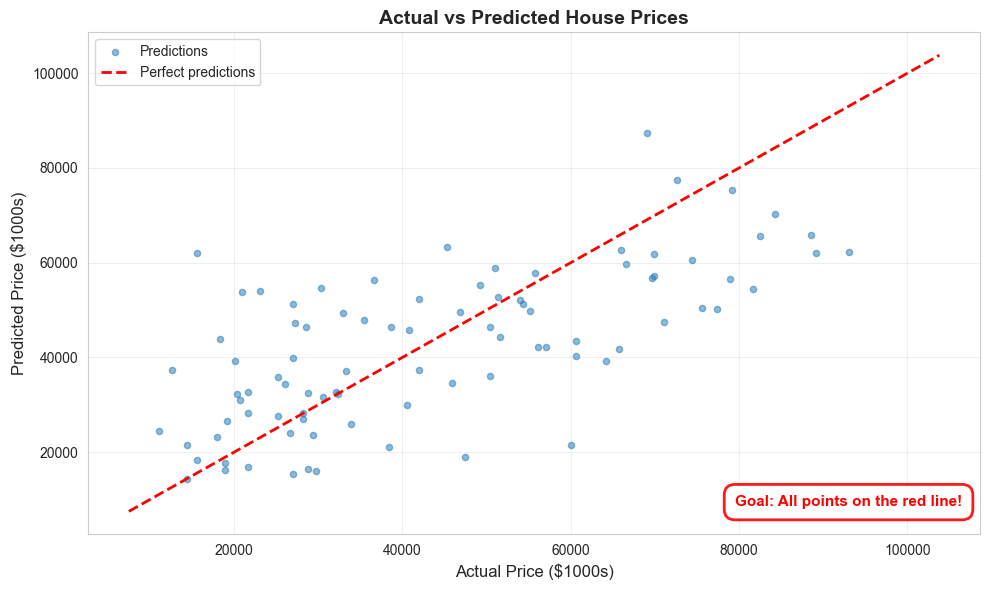


🧠 ANALYZING THE SCATTER PLOT:

🎯 THE RED DIAGONAL LINE = PERFECTION
  • If all dots were ON the line? Model is perfect (never happens!)
  • If dots are CLOSE to the line? Model is doing pretty good!
  • If dots are ALL OVER THE PLACE? Model is struggling 💀

📊 WHAT THE DOTS TELL YOU:
  • Dots ABOVE red line: 42 points
     → Model predicted TOO HIGH (overestimated prices)
  • Dots BELOW red line: 47 points
     → Model predicted TOO LOW (underestimated prices)
  • Dots NEAR the line: 43 points
     → Model was pretty close! Good job!

✓  Model is fairly balanced (not biased up or down)

💡 KEY INSIGHT:
The TIGHTER the cloud of dots around the red line = the BETTER your model!
If dots are scattered everywhere? Your model needs work (or you need better features).


In [35]:
print("📊 PREDICTIONS vs ACTUAL - Let's visualize!")
print()

plt.figure(figsize=(10, 6))
plt.scatter(y_test*100, y_pred*100, alpha=0.5, s=20, label='Predictions')
plt.plot([y.min()*100, y.max()*100], [y.min()*100, y.max()*100], 
         'r--', linewidth=2, label='Perfect predictions')
plt.xlabel('Actual Price ($1000s)', fontsize=12)
plt.ylabel('Predicted Price ($1000s)', fontsize=12)
plt.title('Actual vs Predicted House Prices', fontsize=14, fontweight='bold')

# Add annotation - NO EMOJI to avoid font warnings
plt.text(0.98, 0.05, 'Goal: All points on the red line!', 
         transform=plt.gca().transAxes,
         fontsize=11, color='red', weight='bold',
         ha='right', va='bottom',
         bbox=dict(boxstyle='round,pad=0.7', facecolor='white', 
                  edgecolor='red', linewidth=2, alpha=0.9))

plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🧠 ANALYZING THE SCATTER PLOT:")
print("="*60)

print("\n🎯 THE RED DIAGONAL LINE = PERFECTION")
print("  • If all dots were ON the line? Model is perfect (never happens!)")
print("  • If dots are CLOSE to the line? Model is doing pretty good!")
print("  • If dots are ALL OVER THE PLACE? Model is struggling 💀")

print("\n📊 WHAT THE DOTS TELL YOU:")

# Calculate how many points are above/below/near the line
above_line = (y_pred > y_test).sum()
below_line = (y_pred < y_test).sum()
near_line = np.abs(y_pred - y_test) < (y_test.std() * 0.5)
near_count = near_line.sum()

print(f"  • Dots ABOVE red line: {above_line} points")
print(f"     → Model predicted TOO HIGH (overestimated prices)")
print(f"  • Dots BELOW red line: {below_line} points")
print(f"     → Model predicted TOO LOW (underestimated prices)")
print(f"  • Dots NEAR the line: {near_count} points")
print(f"     → Model was pretty close! Good job!")

# Check for patterns
if above_line > below_line * 1.5:
    print("\n⚠️  Model tends to OVERESTIMATE prices")
elif below_line > above_line * 1.5:
    print("\n⚠️  Model tends to UNDERESTIMATE prices")
else:
    print("\n✓  Model is fairly balanced (not biased up or down)")

print("\n💡 KEY INSIGHT:")
print("The TIGHTER the cloud of dots around the red line = the BETTER your model!")
print("If dots are scattered everywhere? Your model needs work (or you need better features).")

## 📊 Step 3: Metric #1 - MAE (Mean Absolute Error) 📏
*The most intuitive metric - just average how wrong you are*

### What is it?
Take all your errors (ignore if positive or negative), average them.

**What's Σ (Sigma)?** It means "sum" - add up all the values. So `Σ|actual - predicted|` means "add up all the absolute errors."

Formula: `MAE = (1/n) × Σ|actual - predicted|`

### The Metaphor
You're a dartboard player. MAE is your average distance from the bullseye.
- Hit bullseye? Error = 0
- Hit 5 inches away? Error = 5
- Hit 10 inches away? Error = 10

MAE = average of all those distances.

### Why it's awesome
- **Same units as your target** (dollars, not squared dollars!)
- Easy to explain to non-technical people
- All errors treated equally (fair, but sometimes too fair...)

Let's see our model's MAE!

In [36]:
print("📏 MAE (Mean Absolute Error) - Average error in dollars")
print("Formula: MAE = Average of |actual - predicted|")
print()

mae = mean_absolute_error(y_test, y_pred)

print(f"MAE: ${mae*100:.2f}k")
print(f"\nWhat this means:")
print(f"On average, our predictions are off by ${mae*100:.2f}k")
print(f"(Could be too high or too low)")

# Show some examples
errors = np.abs(y_test - y_pred) * 100
print(f"\n📋 Sample predictions:")
for i in range(5):
    print(f"House {i+1}: Actual ${y_test.iloc[i]*100:.0f}k, "
          f"Predicted ${y_pred[i]*100:.0f}k, "
          f"Error: ${errors.iloc[i]:.0f}k")

print(f"\nAverage of all {len(errors)} errors: ${errors.mean():.2f}k")
print("✓ MAE is easy to understand - same units as your target!")

📏 MAE (Mean Absolute Error) - Average error in dollars
Formula: MAE = Average of |actual - predicted|

MAE: $12838.23k

What this means:
On average, our predictions are off by $12838.23k
(Could be too high or too low)

📋 Sample predictions:
House 1: Actual $65700k, Predicted $41864k, Error: $23836k
House 2: Actual $21000k, Predicted $53855k, Error: $32855k
House 3: Actual $60600k, Predicted $40212k, Error: $20388k
House 4: Actual $69000k, Predicted $87425k, Error: $18425k
House 5: Actual $33300k, Predicted $37137k, Error: $3837k

Average of all 89 errors: $12838.23k
✓ MAE is easy to understand - same units as your target!


## 📊 Step 4: Metric #2 - MSE (Mean Squared Error) 📐
*Punish big mistakes like they owe you money*

### What is it?
Square all your errors (makes them positive), then average.

Formula: `MSE = (1/n) × Σ(actual - predicted)²`

### The Metaphor
Imagine your roommate keeps eating your food. You fine them:
- Ate a chip? $1 fine ($1² = $1)
- Ate a cookie? $10 fine ($10² = $100) 
- Ate your whole pizza? $100 fine ($100² = $10,000)

**Notice:** The pizza theft fine is 10,000× worse than the chip! That's what squaring does - it heavily penalizes big errors.

### Why it exists
- **For training models** - Machine learning loves squared errors (calculus reasons - makes math easier for optimization)
- **Penalizes outliers** - One huge mistake tanks your score
- **Not for humans** - Units are squared (what's a "squared dollar"? 🤷)

Let's see how brutal MSE is...

In [37]:
print("📐 MSE (Mean Squared Error) - Penalizes big mistakes")
print("Formula: MSE = Average of (actual - predicted)²")
print()

mse = mean_squared_error(y_test, y_pred)

print(f"MSE: {mse:.4f} (in squared units)")

print(f"\n🤔 Why square the errors?")
print("Small errors stay small, big errors get PUNISHED:")
print()
print("Error    Squared")
print("="*20)
example_errors = [10, 20, 50, 100]  # in $k
for err in example_errors:
    err_actual = err / 100  # Convert to units
    squared = err_actual ** 2
    print(f"${err:3d}k  →  {squared:.4f}")

print(f"\nNotice: $100k error is 100x worse than $10k error!")
print("✓ MSE is good for training models (penalizes big mistakes)")
print("✗ MSE is in squared units (hard to interpret)")

📐 MSE (Mean Squared Error) - Penalizes big mistakes
Formula: MSE = Average of (actual - predicted)²

MSE: 26101.7427 (in squared units)

🤔 Why square the errors?
Small errors stay small, big errors get PUNISHED:

Error    Squared
$ 10k  →  0.0100
$ 20k  →  0.0400
$ 50k  →  0.2500
$100k  →  1.0000

Notice: $100k error is 100x worse than $10k error!
✓ MSE is good for training models (penalizes big mistakes)
✗ MSE is in squared units (hard to interpret)


## 📊 Step 5: Metric #3 - RMSE (Root Mean Squared Error) 📊
*THE MOST POPULAR METRIC - MSE but human-readable*

### What is it?
Just take the square root of MSE to get back to normal units!

**What's √ (square root)?** The opposite of squaring. If 10² = 100, then √100 = 10. We use it to "undo" the squaring from MSE.

Formula: `RMSE = √MSE = √[(1/n) × Σ(actual - predicted)²]`

### Why it's the GOAT
1. **Interpretable units** (dollars, not squared dollars)
2. **Still penalizes big mistakes** (inherited from MSE)
3. **Industry standard** (this is what people report)

### RMSE vs MAE
- **MAE** = Average error (treats all mistakes equally)
- **RMSE** = Typical error (punishes outliers more)

RMSE will **always** be ≥ MAE. If they're close, your errors are consistent. If RMSE >> MAE, you have some really bad outliers!

Let's calculate it!

📊 RMSE (Root Mean Squared Error) - Best of both worlds!
Formula: RMSE = √MSE

RMSE: $16156.03k

🔄 Compare with MAE:
  MAE:  $12838.23k (average error)
  RMSE: $16156.03k (typical error, penalizes outliers)

RMSE is higher than MAE because it punishes big mistakes more


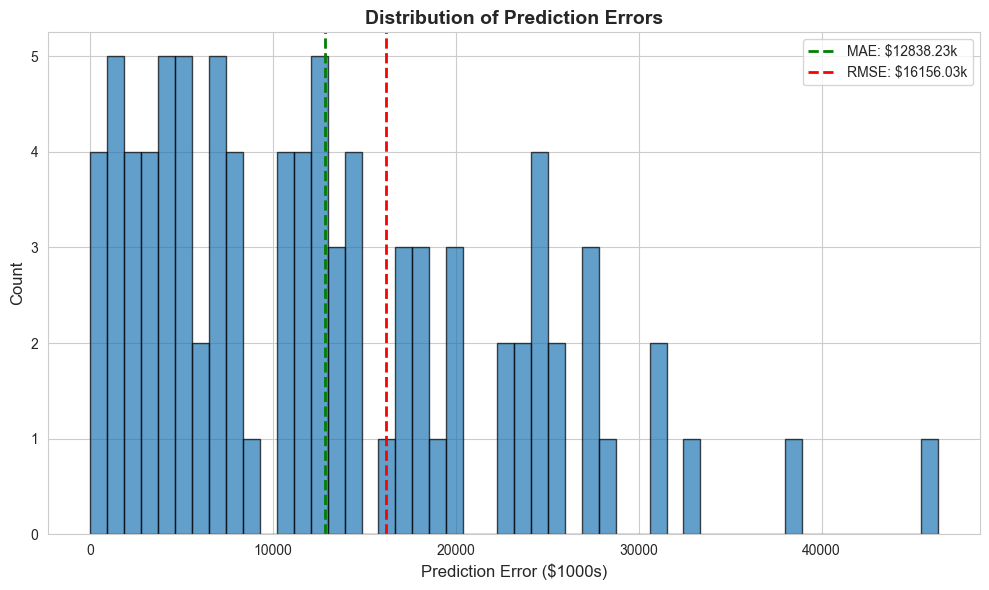


🧠 ANALYZING THE ERROR HISTOGRAM:

📊 THE BARS = YOUR ERROR DISTRIBUTION
  • Tall bars on the LEFT? Most errors are SMALL → Model is good! 🔥
  • Tall bars on the RIGHT? Big errors happening → Model struggling 💀
  • Bars spread out everywhere? Inconsistent predictions → Model needs work

🟢 GREEN LINE (MAE) vs 🔴 RED LINE (RMSE):
  • MAE  (green): $12838.23k - Average error
  • RMSE (red):   $16156.03k - Typical error (penalizes outliers)

  Gap between them: $3317.81k (25.8% difference)
  ⚡ MODERATE GAP. Some outliers exist but not terrible
     → Model mostly consistent, few big mistakes

🎯 OUTLIER CHECK:
  Houses with errors > 2× MAE: 9 out of 89
  💀 TOO MANY OUTLIERS! Model struggling on certain houses
     → Need better features or model needs debugging

💡 KEY INSIGHT:
Best case: Histogram is NARROW and TALL on the left (small errors!)
Worst case: Histogram is WIDE and FLAT (errors all over the place)

✓ RMSE is the MOST COMMONLY USED regression metric!
✓ Back to interpretable units (

In [38]:
print("📊 RMSE (Root Mean Squared Error) - Best of both worlds!")
print("Formula: RMSE = √MSE")
print()

rmse = np.sqrt(mse)

print(f"RMSE: ${rmse*100:.2f}k")

print(f"\n🔄 Compare with MAE:")
print(f"  MAE:  ${mae*100:.2f}k (average error)")
print(f"  RMSE: ${rmse*100:.2f}k (typical error, penalizes outliers)")
print(f"\nRMSE is {'higher' if rmse > mae else 'lower'} than MAE because it punishes big mistakes more")

# Show distribution of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(mae*100, color='green', linestyle='--', linewidth=2, label=f'MAE: ${mae*100:.2f}k')
plt.axvline(rmse*100, color='red', linestyle='--', linewidth=2, label=f'RMSE: ${rmse*100:.2f}k')
plt.xlabel('Prediction Error ($1000s)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
plt.legend()
plt.tight_layout()
plt.show()

print("\n🧠 ANALYZING THE ERROR HISTOGRAM:")
print("="*60)

print("\n📊 THE BARS = YOUR ERROR DISTRIBUTION")
print("  • Tall bars on the LEFT? Most errors are SMALL → Model is good! 🔥")
print("  • Tall bars on the RIGHT? Big errors happening → Model struggling 💀")
print("  • Bars spread out everywhere? Inconsistent predictions → Model needs work")

print("\n🟢 GREEN LINE (MAE) vs 🔴 RED LINE (RMSE):")
print(f"  • MAE  (green): ${mae*100:.2f}k - Average error")
print(f"  • RMSE (red):   ${rmse*100:.2f}k - Typical error (penalizes outliers)")

# Analyze the gap between MAE and RMSE
gap = (rmse - mae) * 100
gap_percent = (gap / (mae*100)) * 100

print(f"\n  Gap between them: ${gap:.2f}k ({gap_percent:.1f}% difference)")

if gap_percent > 30:
    print("  ⚠️  BIG GAP! You have some really bad outliers (big mistakes)")
    print("     → Model is making some MASSIVE mistakes on certain houses")
elif gap_percent > 15:
    print("  ⚡ MODERATE GAP. Some outliers exist but not terrible")
    print("     → Model mostly consistent, few big mistakes")
else:
    print("  ✓  SMALL GAP! Errors are pretty consistent")
    print("     → Model makes similar-sized mistakes (predictable errors)")

# Find outliers
outlier_threshold = mae * 100 * 2  # Errors > 2x MAE
outliers = errors[errors > outlier_threshold]
outlier_count = len(outliers)

print(f"\n🎯 OUTLIER CHECK:")
print(f"  Houses with errors > 2× MAE: {outlier_count} out of {len(errors)}")
if outlier_count > len(errors) * 0.1:
    print("  💀 TOO MANY OUTLIERS! Model struggling on certain houses")
    print("     → Need better features or model needs debugging")
elif outlier_count > 0:
    print("  😐 Some outliers present (normal for regression)")
    print("     → Acceptable, but investigate if possible")
else:
    print("  ✨ NO MAJOR OUTLIERS! Model is consistent!")

print("\n💡 KEY INSIGHT:")
print("Best case: Histogram is NARROW and TALL on the left (small errors!)")
print("Worst case: Histogram is WIDE and FLAT (errors all over the place)")

print("\n✓ RMSE is the MOST COMMONLY USED regression metric!")
print("✓ Back to interpretable units (dollars)")
print("✓ Still penalizes large errors")

### 🎯 CHALLENGE: Impact of Outliers!

Want to see why MSE/RMSE penalizes big errors more than MAE?

**Try this experiment:**
1. Take the first prediction and make it way worse: `y_pred[0] = y_pred[0] * 3`
2. Recalculate MAE and RMSE
3. Compare how much each metric changed

**Question:** Which metric increased more? Why does this matter in real applications?

**Hint:** This is why RMSE is preferred - it alerts you to outliers!

## 📊 Step 6: Metric #4 - R² (R-Squared) 🎯
*"How good is my model?" in one number*

### What is it?
R² (pronounced "R-squared") tells you how much of the variance your model explains.

**What's variance?** How spread out the data is. High variance = prices vary a lot. Low variance = prices are similar.

**What's SS_residual?** Sum of Squared residuals (your prediction errors squared and added up).

**What's SS_total?** Total Sum of Squares (total variance in the data).

Formula: `R² = 1 - (SS_residual / SS_total)`

### The Metaphor
You're explaining why houses cost different amounts:
- **R² = 0%** → "All houses are the same price" (worst model ever - just predicts the average)
- **R² = 50%** → "I can explain half the price variation"
- **R² = 100%** → "I can predict prices perfectly!" (never happens in real life)

### Scale
- **R² = 1.0** → Perfect predictions (impossible!)
- **R² = 0.7-0.9** → Pretty good
- **R² = 0.5-0.7** → Decent, could be better
- **R² = 0-0.5** → Weak, needs work
- **R² < 0** → Model is WORSE than just guessing the average 💀

### When to use it
- **Comparing models** - Higher R² = better model
- **Quick quality check** - Is this model even worth using?
- **Explaining to stakeholders** - "We explain 80% of price variation!"

Let's see how good our model is!

In [39]:
print("🎯 R² (R-Squared) - How much variance does our model explain?")
print("Formula: R² = 1 - (Sum of squared residuals) / (Total variance)")
print()

r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.3f}")

print(f"\n🤔 What this means:")
print(f"Our model explains {r2*100:.1f}% of the variance in house prices")
print(f"Remaining {(1-r2)*100:.1f}% is due to factors we don't have data for")

# Interpretation
print(f"\n📊 Rating your model:")
if r2 > 0.8:
    print("🔥 Really good model! (R² > 0.8)")
elif r2 > 0.5:
    print("👍 Decent model (R² > 0.5)")
elif r2 > 0:
    print("😐 Weak model, needs improvement (R² > 0)")
else:
    print("💩 Model is worse than just predicting the average! (R² < 0)")

# Compare with baseline
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mae = mean_absolute_error(y_test, baseline_pred)

print(f"\n🆚 Comparison with dumb baseline (always predict average):")
print(f"  Our model MAE:  ${mae*100:.2f}k")
print(f"  Baseline MAE:   ${baseline_mae*100:.2f}k")
improvement = (baseline_mae - mae) * 100
print(f"  Improvement:    ${improvement:.2f}k better! 🎉")

print("\n✓ R² shows 'goodness of fit'")
print("✓ Good for comparing different models")
print("✗ Doesn't tell you about prediction errors directly")

🎯 R² (R-Squared) - How much variance does our model explain?
Formula: R² = 1 - (Sum of squared residuals) / (Total variance)

R² Score: 0.453

🤔 What this means:
Our model explains 45.3% of the variance in house prices
Remaining 54.7% is due to factors we don't have data for

📊 Rating your model:
😐 Weak model, needs improvement (R² > 0)

🆚 Comparison with dumb baseline (always predict average):
  Our model MAE:  $12838.23k
  Baseline MAE:   $19201.94k
  Improvement:    $6363.71k better! 🎉

✓ R² shows 'goodness of fit'
✓ Good for comparing different models
✗ Doesn't tell you about prediction errors directly


## Summary: All Metrics Together
*Here's what you should screenshot for your boss*

Now you've seen all 4 metrics! Here's when to use each one:

| Metric | When to Use | Pros | Cons |
|--------|-------------|------|------|
| **MAE** | Want simple, interpretable average error | Easy to explain | Treats all errors equally |
| **MSE** | Training models (optimization) | Penalizes outliers | Squared units (confusing) |
| **RMSE** | **DEFAULT CHOICE** for reporting | Best of both worlds | None really! |
| **R²** | Comparing models, quality check | Single 0-1 score | Doesn't show error magnitude |

**Pro tip:** Always report RMSE + R² together. RMSE tells you "how wrong", R² tells you "how good".

In [40]:
print("="*60)
print("📋 REGRESSION METRICS SUMMARY")
print("="*60)

print(f"\n🎯 Error Metrics (lower = better):")
print(f"  MAE:   ${mae*100:.2f}k  (average error)")
print(f"  RMSE:  ${rmse*100:.2f}k  (typical error, accounts for outliers)")
print(f"  MSE:   {mse:.4f}  (for training/optimization)")

print(f"\n🏆 Quality Metric (higher = better):")
print(f"  R²:    {r2:.3f}  (explains {r2*100:.1f}% of variance)")

print(f"\n📊 YOUR MODEL PERFORMANCE:")
print(f"✓ Typical prediction error: ±${rmse*100:.2f}k")
print(f"✓ Model quality: {'Good' if r2 > 0.7 else 'Needs work'}")
print(f"✓ Best/worst errors: ${errors.min():.0f}k / ${errors.max():.0f}k")

# Error breakdown
small_errors = (errors < 30).sum()
medium_errors = ((errors >= 30) & (errors < 60)).sum()
large_errors = (errors >= 60).sum()

print(f"\n💡 Error Distribution:")
print(f"  < $30k error:  {small_errors:4d} ({small_errors/len(errors)*100:.1f}%)")
print(f"  $30-60k error: {medium_errors:4d} ({medium_errors/len(errors)*100:.1f}%)")
print(f"  > $60k error:  {large_errors:4d} ({large_errors/len(errors)*100:.1f}%)")

print("\n🧠 LESSON COMPLETE - KEY TAKEAWAYS:")
print("="*60)
print("1. MAE = Simple average error")
print("   ✓ Easy to understand (same units as target)")
print("   ✓ All errors treated equally")
print()
print("2. MSE = Squared error (for training)")
print("   ✓ Penalizes big mistakes heavily")
print("   ✗ Units are squared (hard to interpret)")
print()
print("3. RMSE = Most commonly used!")
print("   ✓ Interpretable units")
print("   ✓ Penalizes large errors")
print("   ✓ Default choice for reporting")
print()
print("4. R² = Model quality (0 to 1)")
print("   ✓ Shows % of variance explained")
print("   ✓ Good for comparing models")
print()
print("🎉 Great job learning regression evaluation!")
print("\n🚀 Next up: Lesson 3 - Text Classification!")

📋 REGRESSION METRICS SUMMARY

🎯 Error Metrics (lower = better):
  MAE:   $12838.23k  (average error)
  RMSE:  $16156.03k  (typical error, accounts for outliers)
  MSE:   26101.7427  (for training/optimization)

🏆 Quality Metric (higher = better):
  R²:    0.453  (explains 45.3% of variance)

📊 YOUR MODEL PERFORMANCE:
✓ Typical prediction error: ±$16156.03k
✓ Model quality: Needs work
✓ Best/worst errors: $3k / $46348k

💡 Error Distribution:
  < $30k error:     1 (1.1%)
  $30-60k error:    1 (1.1%)
  > $60k error:    87 (97.8%)

🧠 LESSON COMPLETE - KEY TAKEAWAYS:
1. MAE = Simple average error
   ✓ Easy to understand (same units as target)
   ✓ All errors treated equally

2. MSE = Squared error (for training)
   ✓ Penalizes big mistakes heavily
   ✗ Units are squared (hard to interpret)

3. RMSE = Most commonly used!
   ✓ Interpretable units
   ✓ Penalizes large errors
   ✓ Default choice for reporting

4. R² = Model quality (0 to 1)
   ✓ Shows % of variance explained
   ✓ Good for compa